In [1]:
import pandas as pd

df = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')
df.head() 

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,22/05/2020,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
1,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
2,20/05/2020,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
3,19/05/2020,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
4,18/05/2020,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia


In [2]:
groupby_country = df.groupby('countryterritoryCode')
groupby_country.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,22/05/2020,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
1,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
2,20/05/2020,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
3,19/05/2020,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia
4,18/05/2020,18,5,2020,262,1,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
18558,22/05/2020,22,5,2020,3,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
18559,21/05/2020,21,5,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
18560,20/05/2020,20,5,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
18561,19/05/2020,19,5,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


In [3]:
sum_cases_by_country = groupby_country.cases.sum()
print(sum_cases_by_country)

countryterritoryCode
ABW      101
AFG     8676
AGO       58
ALB      969
AND      762
       ...  
XKX     1003
YEM      193
ZAF    19137
ZMB      866
ZWE       51
Name: cases, Length: 205, dtype: int64


In [4]:
#we will make a plot with 10 most infected countries by covid 5/21/2020
most_infected_countries = sum_cases_by_country.reset_index().nlargest(10, 'cases')
most_infected_countries

,countryterritoryCode,cases
192,USA,1577287
157,RUS,317554
25,BRA,310087
65,GBR,250908
57,ESP,233037
92,ITA,228006
48,DEU,177212
186,TUR,153548
62,FRA,144163
88,IRN,129341


Text(0, 0.5, 'Active covid-19 cases 21/05/2020')

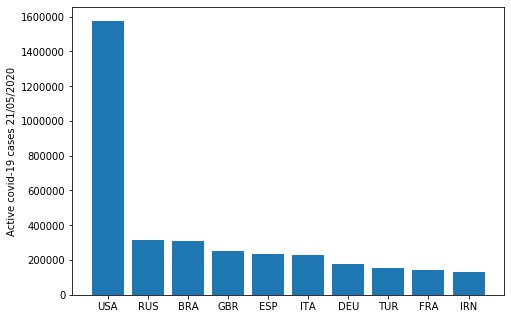

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(most_infected_countries.countryterritoryCode.unique(), most_infected_countries.cases.unique())

ax.set_ylabel('Active covid-19 cases 21/05/2020')